In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import math
%matplotlib inline

import sys
sys.path.insert(0, '../scripts')

import stft_zoom, display, detect_musical_regions
from util import *
import mappings
import pickle
import PIL
import IPython.display
from classes import SingleResSpectrogram, MultiResSpectrogram

In [2]:
y, sr = librosa.load('../data/example.wav', sr=44100)

In [4]:
n_fft=2048

spec = np.abs(librosa.stft(y, n_fft=n_fft))
spec_db = librosa.amplitude_to_db(spec, ref=np.max)

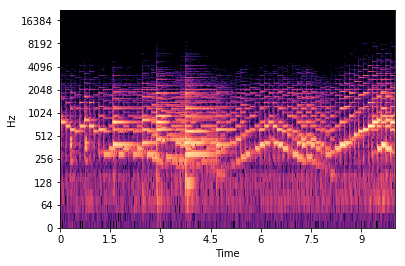

In [5]:
librosa.display.specshow(spec_db, y_axis='log', x_axis='time', sr=sr)

In [39]:
spec_zoom = stft_zoom.stft_zoom(y, [200,400], [3.6,4.0])

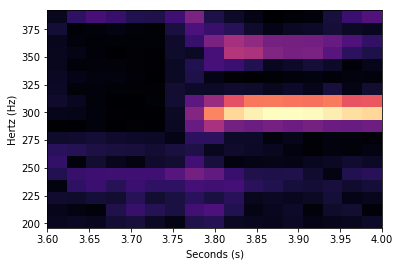

In [40]:
display.specshow(spec_zoom[0],spec_zoom[1], spec_zoom[2])

In [41]:
spec_example = spec_zoom[0]

In [12]:
def shannon_entropy_axis(tfp_region, axis=0):
    hist = np.histogram(np.sum(tfp_region, axis=axis), bins=10, density=True)[0]
    return scipy.stats.entropy(hist)

In [42]:
# 0 == eixo da freq
# 1 == eixo do tempo

print(shannon_entropy_axis(spec_example, axis=0), shannon_entropy_axis(spec_example, axis=1))

1.46097074772 1.68924530996


In [43]:
print(np.max(np.var(spec_example, axis=0)), np.max(np.var(spec_example, axis=1)))

0.017131 0.0475501


In [14]:
np.sum([[2,3],[4,5]],axis=0)

array([6, 8])

In [32]:
a = np.array([[2,3],[4,5]])

In [33]:
a

array([[2, 3],
       [4, 5]])

In [34]:
np.sum(a, axis=0)

array([6, 8])